In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/synthetic_greenhouse_data.csv")
print("Data loaded.")
print(df.head())

Data loaded.
                     datetime  next_internal_temp  next_internal_hum  \
0  2025-07-14 01:02:22.513978           68.710835          69.538413   
1  2025-07-14 01:02:22.513978           66.513979          71.061493   
2  2025-07-14 01:02:22.513978           66.380080          72.508418   
3  2025-07-14 01:02:22.513978           67.933820          73.882997   
4  2025-07-14 01:02:22.513978           66.332029          75.188847   

   external_temp  internal_temp  external_humidity  internal_humidity  \
0      86.930467      67.751907          86.445592          67.935172   
1      24.773715      68.710835          76.323427          69.538413   
2      63.836000      66.513979          83.702181          71.061493   
3      97.454877      66.380080          63.699739          72.508418   
4      35.898007      67.933820          55.115025          73.882997   

   heating  venting  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4    

In [4]:
features = ["external_temp", "external_humidity", "internal_temp", "internal_humidity", "heating", "venting"]

y_reg = df["next_internal_temp"]

y_clf_heat = df["heating"]
y_clf_vent = df["venting"]

X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    df[features], y_reg, test_size=0.2, random_state=42
)

_, _, y_clf_heat_train, y_clf_heat_test = train_test_split(
    df[features], y_clf_heat, test_size=0.2, random_state=42
)

_, _, y_clf_vent_train, y_clf_vent_test = train_test_split(
    df[features], y_clf_vent, test_size=0.2, random_state=42
)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
reg_model = tf.keras.Sequential([
    tf.keras.Input(shape=(len(features),)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

reg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Training regression model...")
history_reg = reg_model.fit(
    X_train_scaled, y_reg_train,
    epochs=60, validation_split=0.2, verbose=1
)

Training regression model...
Epoch 1/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4652.1611 - mae: 65.4807 - val_loss: 4431.0547 - val_mae: 63.5297
Epoch 2/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4245.1748 - mae: 62.8235 - val_loss: 3858.7075 - val_mae: 59.0219
Epoch 3/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3574.0208 - mae: 57.1430 - val_loss: 2738.7676 - val_mae: 49.2602
Epoch 4/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2424.2803 - mae: 46.4713 - val_loss: 1388.6843 - val_mae: 34.3077
Epoch 5/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1122.4979 - mae: 30.5718 - val_loss: 594.4052 - val_mae: 20.9893
Epoch 6/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 493.3376 - mae: 19.1286 - val_loss: 346.9427 - val_mae: 14.7138
Epoch 7/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 296.1975 - mae: 13.9770 - val_loss: 262.0849 - val_mae: 12.0933
Epoch 8/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 229.7774 - mae: 11.7464 - val_loss

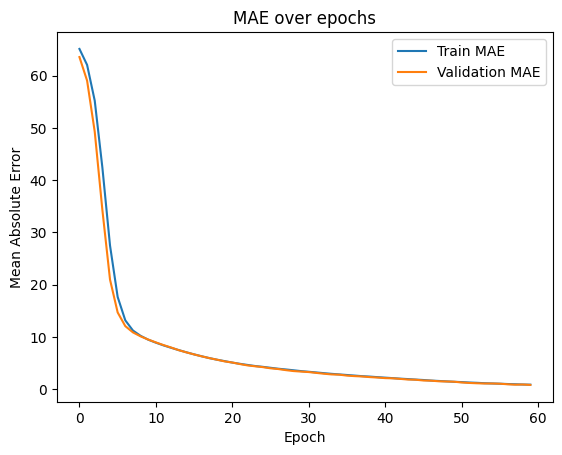

In [7]:
plt.plot(history_reg.history['mae'], label='Train MAE')
plt.plot(history_reg.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('MAE over epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.show()

In [8]:
clf_heat_model = tf.keras.Sequential([
    tf.keras.Input(shape=(len(features),)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

clf_heat_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training classifier model...")
history_clf_heat = clf_heat_model.fit(
    X_train_scaled, y_clf_heat_train,
    epochs=30, validation_split=0.2, verbose=1
)

Training classifier model...
Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7174 - loss: 0.6254 - val_accuracy: 0.9975 - val_loss: 0.3458
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2696 - val_accuracy: 1.0000 - val_loss: 0.1006
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0795 - val_accuracy: 1.0000 - val_loss: 0.0320
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0278 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - lo

In [9]:
clf_vent_model = tf.keras.Sequential([
    tf.keras.Input(shape=(len(features),)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

clf_vent_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training classifier model...")
history_clf_vent = clf_vent_model.fit(
    X_train_scaled, y_clf_vent_train,
    epochs=30, validation_split=0.2, verbose=1
)

Training classifier model...
Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9145 - loss: 0.5441 - val_accuracy: 1.0000 - val_loss: 0.2700
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - loss: 0.2125 - val_accuracy: 1.0000 - val_loss: 0.0794
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0632 - val_accuracy: 1.0000 - val_loss: 0.0256
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - lo

In [10]:
print("\n✅ Regression model evaluation:")
reg_eval = reg_model.evaluate(X_test_scaled, y_reg_test, verbose=0)
print(f"Test MAE: {reg_eval[1]:.2f}")

print("\n✅ Classifier model evaluation:")
clf_heat_eval = clf_heat_model.evaluate(X_test_scaled, y_clf_heat_test, verbose=0)
print(f"Test accuracy: {clf_heat_eval[1]*100:.1f}%")

print("\n✅ Classifier model evaluation:")
clf_vent_eval = clf_vent_model.evaluate(X_test_scaled, y_clf_vent_test, verbose=0)
print(f"Test accuracy: {clf_vent_eval[1]*100:.1f}%")


✅ Regression model evaluation:
Test MAE: 0.96

✅ Classifier model evaluation:
Test accuracy: 100.0%

✅ Classifier model evaluation:
Test accuracy: 100.0%


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


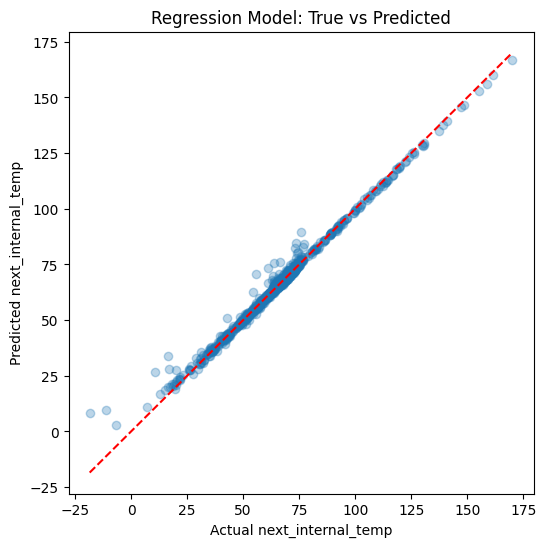

In [11]:
y_pred_reg = reg_model.predict(X_test_scaled).flatten()
plt.figure(figsize=(6,6))
plt.scatter(y_reg_test, y_pred_reg, alpha=0.3)
plt.xlabel("Actual next_internal_temp")
plt.ylabel("Predicted next_internal_temp")
plt.title("Regression Model: True vs Predicted")
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


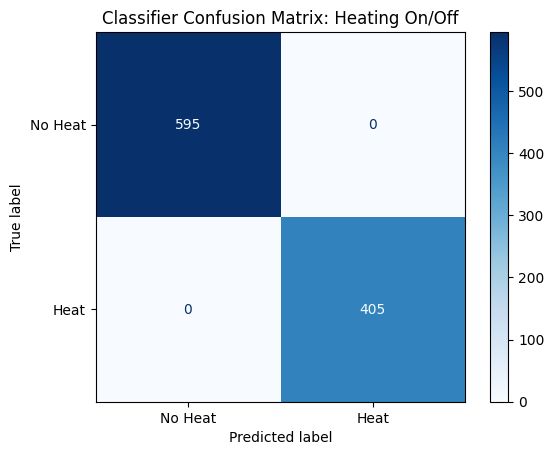

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_clf_heat_probs = clf_heat_model.predict(X_test_scaled)
y_pred_clf_heat = (y_pred_clf_heat_probs > 0.5).astype(int)
cm_heat = confusion_matrix(y_clf_heat_test, y_pred_clf_heat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_heat, display_labels=["No Heat","Heat"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Classifier Confusion Matrix: Heating On/Off")
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


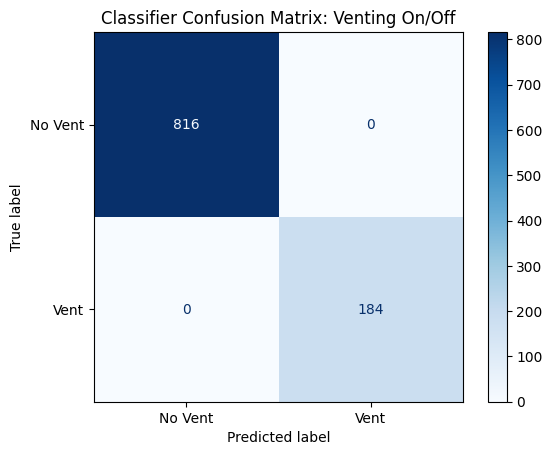

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict for venting
vent_preds_probs = clf_vent_model.predict(X_test_scaled)
vent_preds = (vent_preds_probs > 0.5).astype(int)

# Compute confusion matrix
cm_vent = confusion_matrix(y_clf_vent_test, vent_preds, labels=[0,1])

# Display
disp_vent = ConfusionMatrixDisplay(confusion_matrix=cm_vent, display_labels=["No Vent","Vent"])
disp_vent.plot(cmap=plt.cm.Blues)
plt.title("Classifier Confusion Matrix: Venting On/Off")
plt.show()

In [14]:
reg_model.save("./models/regression_model.keras")
clf_heat_model.save("./models/classifier_heat_model.keras")
clf_vent_model.save("./models/classifier_vent_model.keras")

print("\n✅ Models saved to ./models/")


✅ Models saved to ./models/


In [15]:
import joblib
joblib.dump(scaler, './models/scaler.pkl')

['./models/scaler.pkl']